Soient deux actifs $A,B$, aux caractéristiques suivantes:
- $E[R_A]=5\%$
- $E[R_B]=8\%$
- $\sigma_A=0.3$
- $\sigma_B=0.7$
- $\sigma_{A,B}=0.6$

$1)$ Soit un portefeuille aux pondérations suivantes: $w_A=0.5$ et $w_B=0.5$. En utilisant les opérateurs vus, trouver le rendement espéré du portefeuille, la variance du portefeuille.

$2)$ Trouver le rendement et la variance espérée d'un portefeuille aux pondérations $w_A=0.8$ et $w_B=0.2$.

$3)$ Calculez les ratios de Sharpe $S$ de chaque portefeuille $S=E[R_p]/\sigma_p$.

$4)$ Mettre vos résultats sous forme de *DataFrame*.

In [37]:
import numpy as np
import pandas as pd

# Donnees
rA=0.05
rB=0.08 
sigma_A = 0.3
sigma_B = 0.7
cov_AB = 0.6
Sigma = np.array([[sigma_A**2, cov_AB],
                  [cov_AB, sigma_B**2]])
mu = np.array([rA, rB])
w1 = np.array([0.5, 0.5])  
w2= np.array([0.8, 0.2]) 

#1)
ER1 = w1 @ mu
ER2= w2 @ mu


V1 = w1 @ Sigma @ w1

V2= w2 @ Sigma @ w2

ET1 = np.sqrt(V1)
ET2 = np.sqrt(V2)

#3) Ratio de Sharpe
RS1= ER1/ET1
RS2= ER2/ET2

ER= np.array([ER1, ER2])
V= np.array([V1, V2])
ET= np.array([ET1, ET2])
RS= np.array([RS1, RS2])

#4) Tableau recapitulatif
df = pd.DataFrame({
    'Stats': ['Pf 1', 'Pf 2'],
    'E[Rp]': ER,
    'Var[Rp]': V,
    'Std Dev': ET,
    'Sharpe Ratio': RS
})

print(df)




  Stats  E[Rp]  Var[Rp]   Std Dev  Sharpe Ratio
0  Pf 1  0.065   0.4450  0.667083      0.097439
1  Pf 2  0.056   0.2692  0.518845      0.107932


Simulez $n=500$ portefeuilles aux pondérations $[w_A,w_B]$ aléatoires (utilisez la fonction *np.random*), calculez leurs rendements, ecart-types et ratios de Sharpe puis représentez les couples $(E[R_i],\sigma(R_i))$ de chaque portefeuille $i=1,...,n$ dans un graphique en utilisant la librairie *matplotlib.pyplot*. (Vous pouvez également colorer les points en fonction de leur ratio de sharpe).

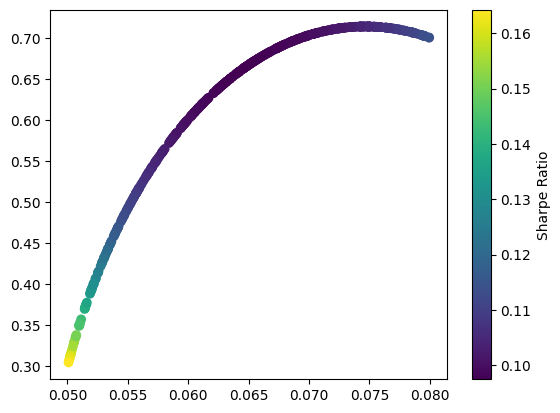

In [34]:
#Frontière efficiente
import matplotlib.pyplot as plt

n=500
wA=np.random.rand(n)
wB=1-wA
w=np.column_stack((wA,wB))

ER=w @ mu
VR = np.array([x @ Sigma @ x for x in w])

ET=np.sqrt(VR)
RS=ER/ET

plt.scatter(ER, ET, c=RS, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')